<a href="https://colab.research.google.com/github/naoya1110/ai_robotics_lab_2025_hands_on/blob/main/Week03_Simple_SGD_Example__with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook explains how the weights and the biases of neural network models are optimized using the stochastic gradient descent (SGD) method.

In this example, we will implement a simple linear regression model with PyTorch.

First, let's import the PyTorch, NumPy, and Matplotlib packages.

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

Here, we create a dataset consisting of $x$ (inputs) and $y$ (outputs) using a simple linear equation below. It's important to note that the output data $y$ contains some random noise.

$y = 5x + 3 + \mathrm{noise}$

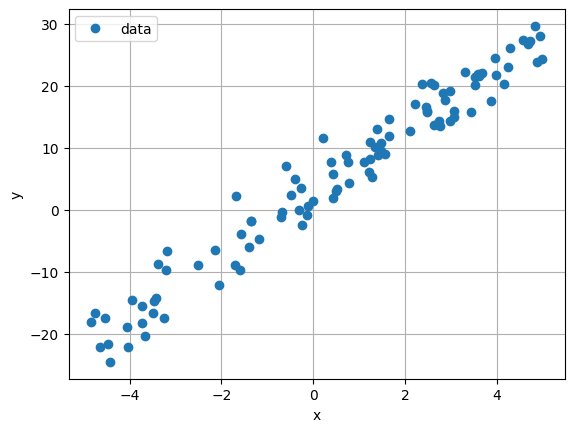

In [8]:
x = 10*np.random.rand(100)-5
noise = 3*np.random.randn(x.shape[0])
y = 5*x + 3 + noise

plt.plot(x, y, marker="o", lw= 0, label="data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()

Our objective is to discover a linear function model (equation) that can effectively capture the relationship between the $x$ and $y$ dataset.

In fact, instead of employing PyTorch, we can use `np.polyfit()` to fit the dataset. This allows us to acquire the fitting parameters $w$ and $b$ for the linear function of $y = wx + b$, where $w$ and $b$ are referred to as the weight and bias, respectively."

In [3]:
w, b = np.polyfit(x, y, 1)
print(f"w={w:.3f}, b={b:.3f}")

w=5.105, b=2.206


Due to the presence of noise in the $x-y$ dataset, the obtained values of $w$ and $b$ may not match the exact values used to create the dataset. Nevertheless, they are typically close enough to allow us to create a fitting line using these parameters.

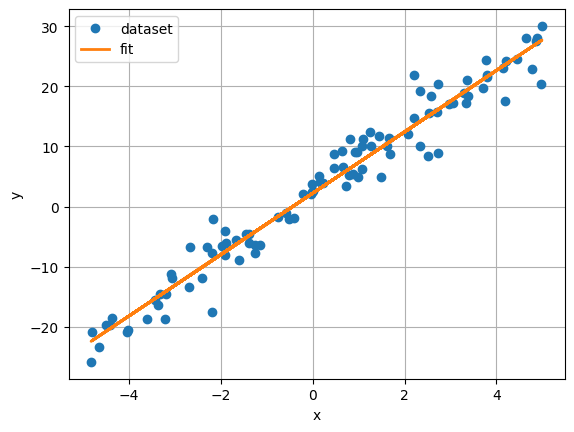

In [4]:
y_fit = w*x + b

plt.plot(x, y, marker="o", lw=0, label="dataset")
plt.plot(x, y_fit, lw=2, label="fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()

While `np.polyfit()` works effectively, in this example, we will achieve the same outcome using PyTorch.

Let's start by converting the $x$ and $y$ dataset into `torch.tensor` objects.

In [9]:
x = torch.tensor(x)
y = torch.tensor(y)

print(type(x))
print(type(y))

<class 'torch.Tensor'>
<class 'torch.Tensor'>


Next, we define a function named `model()` that outputs the predicted value `p` from an input value `x` using the parameters `w` and `b`.

In [11]:
def model(x):
    p = w*x + b
    return p

We also define a function named `loss_func()` to calculate the mean squared error between `p` and `y`. This type of function is referred to as a loss function, which helps measure the degree of error in the model's predictions.

$\displaystyle \mathrm{loss} = \mathrm{mse}(p, y) = \frac{1}{N}\sum_{i=0}^{N-1}(p_i-y_i)^2$

In [13]:
def loss_func(p, y):
    loss = ((p-y)**2).mean()
    return loss

At this stage, we haven't determined the values of `w` and `b` yet. Therefore, we initialize these values with arbitrary numbers.

In [14]:
w = torch.tensor(1.0, requires_grad=True)   # you can set any number here
b = torch.tensor(-5.0, requires_grad=True)  # you can set any number here

Now, we can make a prediction using `model()`

In [15]:
p = model(x)
print(p)

tensor([-3.9049, -2.3689, -4.6200, -5.6777, -2.6223, -3.3513, -3.7923, -3.7713,
        -4.5778, -7.5196, -0.3252, -8.4291, -9.0340, -1.5724, -2.7736, -1.9349,
        -3.3522, -6.3484, -4.2372, -8.9436, -3.6595, -2.4377, -8.7387, -2.1389,
        -5.0123, -2.5169, -6.6787, -4.2212, -1.0322, -4.4930, -0.0181, -4.2894,
        -5.3019, -0.1780, -2.5528, -8.6587, -2.9006, -1.9335, -5.7030, -3.7284,
        -8.1941, -1.3966, -3.6167, -0.8559, -1.3237, -1.4190, -4.5652, -2.2532,
        -9.7547, -9.4632, -2.3788, -6.3623, -2.1764, -8.2169, -9.4206, -7.0443,
        -7.1462, -6.7029, -8.4679, -1.4721, -2.0226, -5.6030, -5.4745, -9.6523,
        -3.4293, -3.7641, -2.2325, -5.2401, -8.3763, -6.3976, -1.0305, -8.7365,
        -0.4229, -5.2752, -6.5684, -0.1250, -4.7848, -2.0118, -6.5932, -0.2723,
        -5.3923, -8.4994, -4.4985, -9.5466, -0.7635, -3.5828, -9.0681, -1.4752,
        -1.1255, -6.1803, -5.1124, -3.5176, -8.2611, -0.0541, -1.6881, -5.1346,
        -3.5143, -2.5228, -0.7159, -9.84

Let's visualize the current prediction. Since we've initialized `w` and `b` with arbitrary numbers, it's expected that the model's prediction won't fit the data well.

In [ ]:
plt.plot(x, y, marker="o", lw=0, label="data")
plt.plot(x, p.detach().numpy(), label="prediction")
plt.grid()
plt.legend()
plt.xlabel("x")
plt.ylabel("y")

Next, we calculate the loss value (mean squared error) using `loss_func()`. It's important to note that the loss value will be very large because `w` and `b` are arbitrary values and have not been optimized yet.

In [16]:
loss = loss_func(p, y)
print(loss)

tensor(236.8407, dtype=torch.float64, grad_fn=<MeanBackward0>)


To optimize `w` and `b`, we must determine the gradients of the loss with respect to the current values of `w` and `b`. This can be achieved using `loss.backward()`. The gradients, denoted as $\displaystyle \frac{\partial \mathrm{loss}}{\partial w}$ and $\displaystyle \frac{\partial \mathrm{loss}}{\partial b}$, can be accessed by `w.grad` and `b.grad`, respectively.

In [17]:
loss.backward()
print(w.grad)
print(b.grad)

tensor(-74.5751)
tensor(-20.1150)


We can update `w` and `b` using the following equations, where $\eta$ represents the learning rate. This method is known as stochastic gradient descent (SGD):

$\displaystyle w := w - \eta\frac{\partial\mathrm{loss}}{\partial w}$

$\displaystyle b := b - \eta\frac{\partial\mathrm{loss}}{\partial b}$

When updating these values, we don't want to compute gradients. To achieve this, we use with `torch.no_grad()` at the beginning.

In [18]:
lr = 0.01    # define learning rate

with torch.no_grad():    # disable gradients calculations
    w -= w.grad*lr       # update w
    b -= b.grad*lr       # update b

At this stage, you'll notice that the values of `w` and `b` are closer to their true values ($w$=5.0, $b$=3.0) compared to the initial values.

In [19]:
print(w)
print(b)

tensor(1.7458, requires_grad=True)
tensor(-4.7989, requires_grad=True)


To further optimize `w` and `b`, we repeat the above process multiple times.

In [25]:
w = torch.tensor(1.0, requires_grad=True)   # you can set any number here
b = torch.tensor(-5.0, requires_grad=True)  # you can set any number here

lr = 0.01    # learning rate
epochs = 300  # how many times we repeat training

w = torch.tensor(3.0, requires_grad=True)    # initialize w
b = torch.tensor(-1.0, requires_grad=True)   # initialize b

# empty lists for saving loss, w, b
loss_list = []
w_list = []
b_list = []

for epoch in range(epochs):

    p = model(x)              # prediction
    loss = loss_func(p, y)    # measure loss
    loss.backward()           # determine gradients

    with torch.no_grad():     # disable autograd
        w -= w.grad*lr        # update w
        b -= b.grad*lr        # update b

        w.grad.zero_() # reset gradient
        b.grad.zero_() # reset gradient

    # save loss, w, b
    loss_list.append(loss.item())
    w_list.append(w.item())
    b_list.append(b.item())

    print(f"Epoch {epoch+1}, loss={loss.item():.3f}, w={w.item():.3f}, b={b.item():.3f}")

Epoch 1, loss=65.017, w=3.371, b=-0.900
Epoch 2, loss=51.451, w=3.679, b=-0.807
Epoch 3, loss=41.891, w=3.936, b=-0.718
Epoch 4, loss=35.119, w=4.149, b=-0.635
Epoch 5, loss=30.288, w=4.325, b=-0.555
Epoch 6, loss=26.809, w=4.472, b=-0.478
Epoch 7, loss=24.276, w=4.593, b=-0.405
Epoch 8, loss=22.403, w=4.694, b=-0.334
Epoch 9, loss=20.992, w=4.777, b=-0.266
Epoch 10, loss=19.908, w=4.845, b=-0.201
Epoch 11, loss=19.054, w=4.902, b=-0.137
Epoch 12, loss=18.364, w=4.948, b=-0.075
Epoch 13, loss=17.791, w=4.986, b=-0.015
Epoch 14, loss=17.303, w=5.017, b=0.043
Epoch 15, loss=16.878, w=5.042, b=0.100
Epoch 16, loss=16.499, w=5.063, b=0.156
Epoch 17, loss=16.156, w=5.079, b=0.210
Epoch 18, loss=15.841, w=5.093, b=0.263
Epoch 19, loss=15.548, w=5.103, b=0.315
Epoch 20, loss=15.274, w=5.111, b=0.365
Epoch 21, loss=15.015, w=5.117, b=0.415
Epoch 22, loss=14.769, w=5.122, b=0.463
Epoch 23, loss=14.534, w=5.126, b=0.511
Epoch 24, loss=14.311, w=5.128, b=0.557
Epoch 25, loss=14.097, w=5.129, b=0.

As you can see now, `w` is now close to 5.0, and `b` is close to 3.0.

Let's visualize how the loss value has decreased.

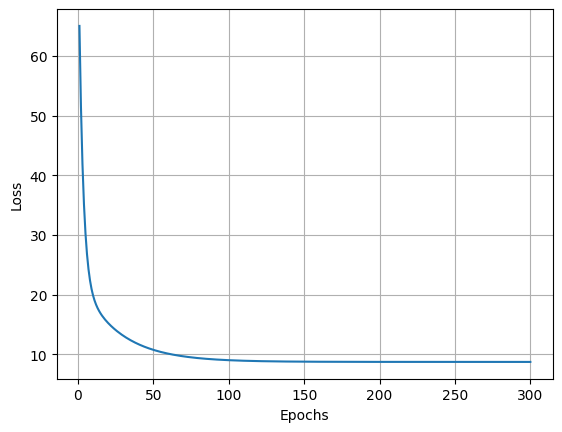

In [26]:
plt.plot(np.arange(epochs)+1, loss_list)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()

Let's visualize how the `w` value has changed.

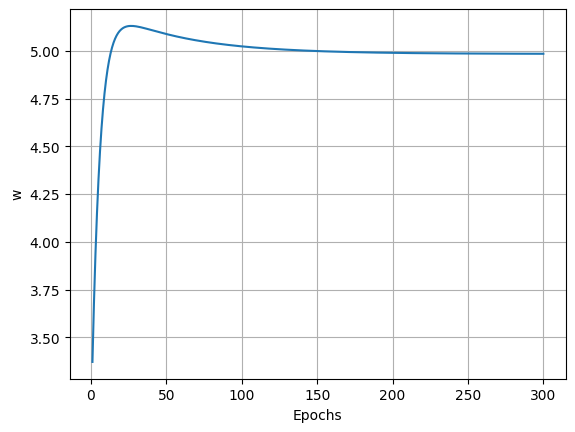

In [27]:
plt.plot(np.arange(epochs)+1, w_list)
plt.xlabel("Epochs")
plt.ylabel("w")
plt.grid()

Let's visualize how the `b` value has changed.

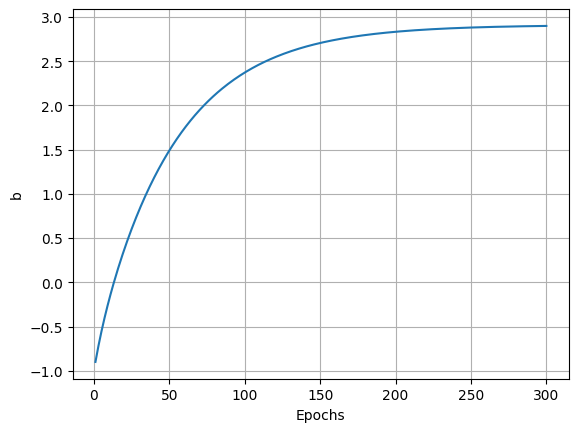

In [28]:
plt.plot(np.arange(epochs)+1, b_list)
plt.xlabel("Epochs")
plt.ylabel("b")
plt.grid()

With the optimized values of `w` and `b`, the model fits the dataset very well.

Text(0, 0.5, 'y')

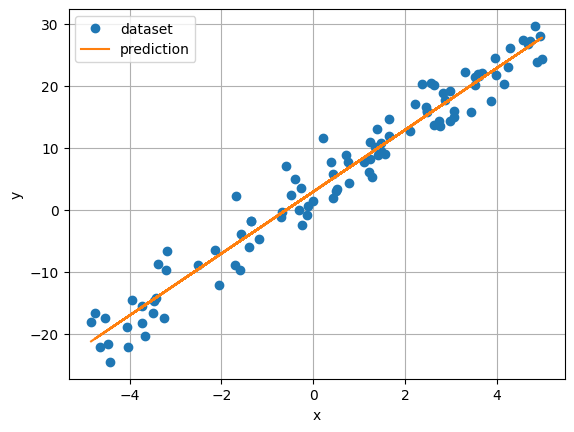

In [29]:
plt.plot(x, y, marker="o", lw=0, label="dataset")
plt.plot(x, p.detach().numpy(), label="prediction")
plt.grid()
plt.legend()
plt.xlabel("x")
plt.ylabel("y")

Now you can try to change initial values of `epochs`, `lr`, `w`, `b` etc., and let's observe the results.